<a href="https://colab.research.google.com/github/CristianCristanchoT/SPAM-DETECTOR/blob/master/TF2_SPAM_DETECTOR_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow-gpu==2.0.0

In [0]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Input, Dense, Flatten, SimpleRNN, GRU, LSTM, GlobalMaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam


In [0]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-02-10 21:26:48--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2020-02-10 21:26:48 (15.3 MB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [0]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [0]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [0]:
df_train, df_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size = 0.33)

In [0]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)


In [0]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Se han encontrado %s tokens unicos' % V)

Se han encontrado 7269 tokens unicos


In [0]:
data_train = pad_sequences(sequences_train)
print('Tamaño de el tensor de datos de entrenamiento:', data_train.shape)

Tamaño de el tensor de datos de entrenamiento: (3733, 189)


In [0]:
T = data_train.shape[1]
print(T)
data_test = pad_sequences(sequences_test, maxlen = T)
print('Tamaño de el tensor de datos de prueba:', data_test.shape)

189
Tamaño de el tensor de datos de prueba: (1839, 189)


In [0]:
D = 20
M = 15

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)



In [0]:
model.compile(
    loss= 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

print('A entrenar!!...')

r = model.fit(
    data_train,
    Y_train,
    epochs = 30,
    validation_data = (data_test, Y_test)
)

A entrenar!!...
Train on 3733 samples, validate on 1839 samples
Epoch 1/30
3733/3733 [==============================] - 4s 1ms/sample - loss: 0.0362 - accuracy: 0.9938 - val_loss: 0.0617 - val_accuracy: 0.9859
Epoch 2/30
3733/3733 [==============================] - 2s 477us/sample - loss: 0.0260 - accuracy: 0.9960 - val_loss: 0.0577 - val_accuracy: 0.9842
Epoch 3/30
3733/3733 [==============================] - 2s 495us/sample - loss: 0.0198 - accuracy: 0.9971 - val_loss: 0.0562 - val_accuracy: 0.9837
Epoch 4/30
3733/3733 [==============================] - 2s 472us/sample - loss: 0.0160 - accuracy: 0.9971 - val_loss: 0.0572 - val_accuracy: 0.9853
Epoch 5/30
3733/3733 [==============================] - 2s 523us/sample - loss: 0.0132 - accuracy: 0.9973 - val_loss: 0.0592 - val_accuracy: 0.9831
Epoch 6/30
3733/3733 [==============================] - 2s 478us/sample - loss: 0.0113 - accuracy: 0.9976 - val_loss: 0.0665 - val_accuracy: 0.9826
Epoch 7/30
3733/3733 [============================

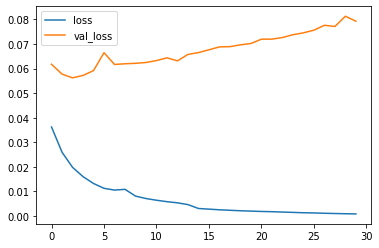

In [0]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

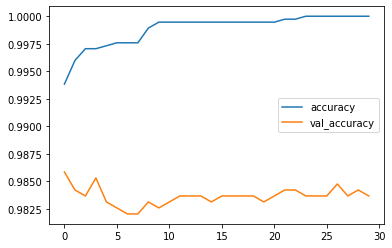

In [0]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()